#  Load libraries

In [1]:
import torch
import matplotlib.pylab as py
import numpy as np
from ipywidgets import interact
torch.manual_seed(123)

# Dynamical Systems

### Notation

Notation for functions $f,g,h$ and vectors $x,y,z$ we use $\circ$ to denote function composition as well as application of a vector function

$$
\begin{bmatrix}
f \\
g \\
h \\
\end{bmatrix}
\circ
\left(
\begin{bmatrix}
x \\
y \\
z \\
\end{bmatrix}
\right)
=
\begin{bmatrix}
f(x) \\
g(y) \\
h(z) \\
\end{bmatrix}
$$

and 

$$
\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}
\circ
\begin{bmatrix}
f \\
g \\
h \\
\end{bmatrix}
\circ
\left(
\begin{bmatrix}
x \\
y \\
z \\
\end{bmatrix}
\right)
=
\begin{bmatrix}
a(f(x)) \\
b(g(y)) \\
c(h(z)) \\
\end{bmatrix}
$$

and so on.



We use $\odot$ to represent the Hadamard product of two matrices $A,B$

$$
A \odot B = 
\begin{bmatrix}
A_{0,0} & A_{0,1} \\
A_{1,0} & A_{1,1} \\
\end{bmatrix}
\odot
\begin{bmatrix}
B_{0,0} & B_{0,1} \\
B_{1,0} & B_{1,1} \\
\end{bmatrix}
=
\begin{bmatrix}
A_{0,0}B_{0,0} & A_{0,1}B_{0,1} \\
A_{1,0}B_{1,0} & A_{1,1}B_{1,1} \\
\end{bmatrix}
$$


$\sigma$ is an arbitrary "activation" function. I.e., $\sigma$ is applied entry-wise to a vector or matrix.

$I$ is the identity activation function such that $I(x)=x$.




### Basic MLP

Consider an MLP N.  For an $l$-layer network this is commonly written as

$$
\sigma(W_{l-1}\; \sigma(W_{l-2}\; \cdots \sigma(W_0\; x  + b_0) \cdots + b_{l-2}) + b_{l-1})
$$

for "weight" matrices $W_i$, "bias" vectors $b_i$, and input data $x$.

### Dynamical systems

A classic discrete or algebraic dynamical system is a *fixed* function that is iterated such as in

$$
f(f(\cdots f(x) \cdots))=f
$$

https://en.wikipedia.org/wiki/Dynamical_system

Famous examples abound!   

The logstic map https://en.wikipedia.org/wiki/Logistic_map

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Logistic_Bifurcation_map_High_Resolution.png/330px-Logistic_Bifurcation_map_High_Resolution.png)

The Lorenz attractor https://en.wikipedia.org/wiki/Lorenz_system

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Lorenz_attractor_yb.svg/330px-Lorenz_attractor_yb.svg.png)

Baker's map https://en.wikipedia.org/wiki/Baker%27s_map

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Ising-tartan.png/330px-Ising-tartan.png)

### Building a bridge between dynamical systems and neural networks

As we will demonstrate, dynamical systems and MLPs share the idea of recursive/iterative maps.  For example, setting 

$$
f(x)  = \sigma(W x + b)
$$ 

we get a dynamical system

$$
\sigma(W\; \sigma(W\; \cdots \sigma(W\; x  + b) \cdots + b) + b)
$$

which is a cousin of the MLP

$$
\sigma(W_{l-1}\; \sigma(W_{l-2}\; \cdots \sigma(W_0\; x  + b_0) \cdots + b_{l-2}) + b_{l-1})
$$

with one **important difference**.   For the MLP $W_i$ and $b_i$ *vary* from iteration to iteration, while in the dynamical system, $W$ and $b$ are *fixed* from iteration to iteration.  
In other words, this is exactly a neural network, except we have simplified it by **sharing weights** between all of the layers.


The question we wish to explore is, what really are the differences between the two approaches?

### Simple example

<img src="https://i.pinimg.com/originals/dd/bf/6a/ddbf6a19df36ca75e22fa1d379957666.png" width="500"/>

Let's make a dynamical system and boil it down to its essence.   In particular, we know that NNs can have quite complicated behavior with their maps that change every iteration.  We therefore wish to understand if dynamical systems can also evince a similar level of complexity, even though the are hobbled by only being able to iterate a *fixed* map.

With this in mind, let us consider a very simple dynamical system.  Namely, let us consider the same dynamical system above by iteration the function

$$
f(x)  = \sigma(W x + b)
$$ 

We begin our simplification by letting $x$, $W$, and $b$ be scalar, leading to the 1D map

$$
f(x) = \sigma(w\; x + b)
$$

Futher, let $\sigma$ be a simple non-linearity, such as the square function, leading to

$$
f(x) = (w\;x + b)^2
$$

### A simple numerical experiment

In [2]:
def f(x,w,c):
    return (w*x+c)**2

In [ ]:
#c=0
# fixed point
#c=-0.5
# hopf
#c=-0.8
# chaos
#c=-1.6
@interact(w=(-1.0,1.0),c=(-2.0,2.0),x=(-1.0,1.0))
def test(w=1.0, c=0.0, x=0.0):
    layers = 50
    record_x = np.zeros(layers)
    for i in range(layers):
        record_x[i] = x
        x = f(x,w,c)
    _,ax = py.subplots(1,2,figsize=(8,4))
    ax[0].plot(record_x,'-o')
    ax[1].plot(record_x[-10:],'-o')

interactive(children=(FloatSlider(value=1.0, description='w', max=1.0, min=-1.0), FloatSlider(value=0.0, descr…

Of course we can see them all at once but just looping over values of $b$.   What do we get?  A cousin of the logistic map!

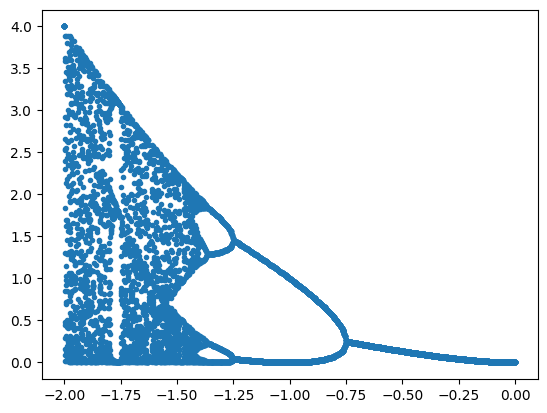

In [4]:
w=1
layers=1000
num_bs = 500
points = []
for i,b in enumerate(np.linspace(0,-2,num_bs)):
    x=0
    for j in range(layers):
        x = f(x,w,b)
        if j > layers-20:
            points += [(b,x)]
points = np.array(points)
py.scatter(points[:,0],points[:,1],marker='.')

### A more *complex* example

If I can be forgiven a small pun, what happens if $b$ is allowed to be complex?  In other words, let's look at 
values of $b$ taken from the complex plane, and just ask "does the scalar neural network with shared weights converge
or go off to infinity (when started at $x=0$)"?  I mean, the set of $b$ for which the scalar neural network (remember with shared weights)
gives a finite value as we add more and more layers must be simple, right?

In [ ]:
@interact(layers=(1, 100))
def complex_f(layers):
    x = np.zeros((200, 200), dtype=complex)
    b_real, b_imag = np.meshgrid(np.linspace(-2, 0, 200), np.linspace(-1, 1, 200))
    b = b_real + 1j * b_imag
    w = 1.0
    for i in range(layers):
        x = f(x,w,b)
        np.clip(x.real, -5, 5, out=x.real)
        np.clip(x.imag, -5, 5, out=x.imag)
    image = np.abs(x) < 2.0
    py.imshow(image, extent=[-2, 0, -1, 1])

interactive(children=(IntSlider(value=50, description='layers', min=1), Output()), _dom_classes=('widget-inter…

This is the Mandelbrot set!   

All from the **simplest** iterative map we could come up with.  

1. The input is always $x=0$
1. Scalar weight $w$ (in fact the weight $w$ is fixed at 1.0)
1. Scalar bias $b$ (both the real and complex case are interesting)
1. The weight and bias are **shared** across all layers

It would appear that weight sharing does not lead to a neural network which is overly simple :-)

https://en.wikipedia.org/wiki/Mandelbrot_set


![](https://upload.wikimedia.org/wikipedia/commons/a/a4/Mandelbrot_sequence_new.gif)

![](https://www.azquotes.com/picture-quotes/quote-the-mandelbrot-set-is-the-most-complex-mathematical-object-known-to-mankind-benoit-mandelbrot-73-97-72.jpg)